Bibliotheken importieren

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Daten einlesen

In [31]:
data = pd.read_csv('../0_DataPreparation/merged_data_full_with_weekdays.csv')
print(data.head())

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          0.0         6.0     17.8375   
1  2013-07-02            1  159.793757          0.0         3.0     17.3125   
2  2013-07-03            1  111.885594          0.0         7.0     21.0750   
3  2013-07-04            1  168.864941          0.0         7.0     18.8500   
4  2013-07-05            1  171.280754          0.0         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  Feiertag  Montag  Dienstag  Mittwoch  \
0                 15.0        20.0       0.0       1         0         0   
1                 10.0        20.0       0.0       0         1         0   
2                  6.0        61.0       0.0       0         0         1   
3                  7.0        20.0       0.0       0         0         0   
4                 12.0        20.0       0.0       0         0         0   

   Donnerstag  Freitag  Samstag  Sonntag  
0           0        0   

Daten vorbereiten

In [32]:
# Datum konvertieren
data['Datum'] = pd.to_datetime(data['Datum'])

# Kodieren von Warengruppe und Wettercode (One-Hot-Encoding)
data = pd.get_dummies(data, columns=['Warengruppe', 'Wettercode'], drop_first=True)

# Prüfen auf fehlende Werte
data.fillna(method='ffill', inplace=True)  # Beispiel: Fehlende Werte auffüllen

print(data.columns)

Index(['Datum', 'Umsatz', 'KielerWoche', 'Bewoelkung', 'Temperatur',
       'Windgeschwindigkeit', 'Feiertag', 'Montag', 'Dienstag', 'Mittwoch',
       'Donnerstag', 'Freitag', 'Samstag', 'Sonntag', 'Warengruppe_2',
       'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6',
       'Wettercode_3.0', 'Wettercode_5.0', 'Wettercode_10.0',
       'Wettercode_17.0', 'Wettercode_20.0', 'Wettercode_21.0',
       'Wettercode_22.0', 'Wettercode_28.0', 'Wettercode_45.0',
       'Wettercode_49.0', 'Wettercode_53.0', 'Wettercode_61.0',
       'Wettercode_63.0', 'Wettercode_65.0', 'Wettercode_68.0',
       'Wettercode_69.0', 'Wettercode_71.0', 'Wettercode_73.0',
       'Wettercode_75.0', 'Wettercode_77.0', 'Wettercode_79.0',
       'Wettercode_95.0'],
      dtype='object')


/tmp/ipykernel_15879/2252536948.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Beispiel: Fehlende Werte auffüllen


Features und Ziel definieren

In [33]:
# Zielvariable
y = data['Umsatz']

# Features
X = data.drop(columns=['Umsatz', 'Datum'])  # Datum kann als numerischer Faktor weggelassen werden

Daten aufteilen

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modell trainieren

In [35]:
# Modell initialisieren und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Vorhersagen treffen und Evaluierung

In [36]:
# Vorhersagen
y_pred = model.predict(X_test)

# Bewertung
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4391.991322815683


R^2 & Adjustierten R^2

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# R^2 berechnen
r2 = r2_score(y_test, y_pred)

# Anzahl der Beobachtungen (n) und Features (p)
n = X_test.shape[0]
p = X_test.shape[1]

# Adjustierten R^2 berechnen
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R^2: {r2:.4f}")
print(f"Adjustiertes R^2: {adjusted_r2:.4f}")

R^2: 0.7494
Adjustiertes R^2: 0.7440


Interpretation der Ergebnisse

In [38]:
# Koeffizienten anzeigen
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                Feature  Coefficient
0           KielerWoche    16.762279
1            Bewoelkung    -0.478845
2            Temperatur     4.104499
3   Windgeschwindigkeit     0.230723
4              Feiertag    69.668976
5                Montag   -15.261326
6              Dienstag   -19.645690
7              Mittwoch   -18.869311
8            Donnerstag   -13.555818
9               Freitag   -11.180262
10              Samstag    37.509382
11              Sonntag    41.003026
12        Warengruppe_2   283.219932
13        Warengruppe_3    40.627346
14        Warengruppe_4   -33.643295
15        Warengruppe_5   156.779664
16        Warengruppe_6   -31.474247
17       Wettercode_3.0     5.043553
18       Wettercode_5.0    16.124968
19      Wettercode_10.0    18.848600
20      Wettercode_17.0   -42.907806
21      Wettercode_20.0    17.503114
22      Wettercode_21.0    16.178717
23      Wettercode_22.0    34.230492
24      Wettercode_28.0    39.614970
25      Wettercode_45.0     5.780452
2

Streudiagramm

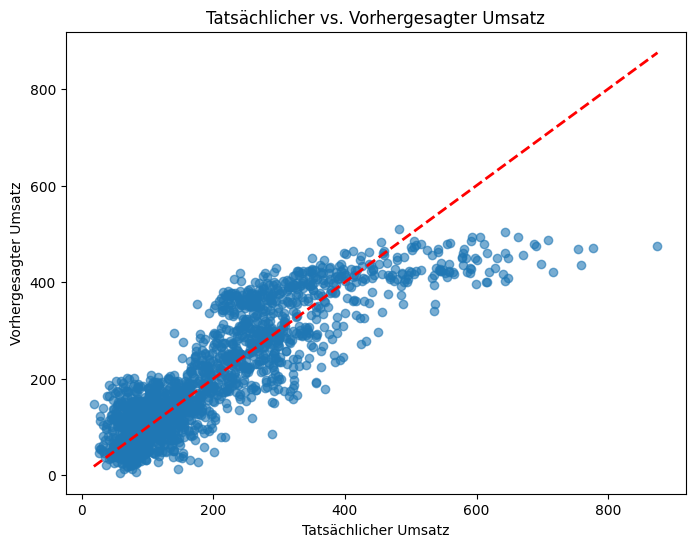

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächlicher Umsatz')
plt.ylabel('Vorhergesagter Umsatz')
plt.title('Tatsächlicher vs. Vorhergesagter Umsatz')
plt.show()

Residualanalyse (Fehleranalyse)

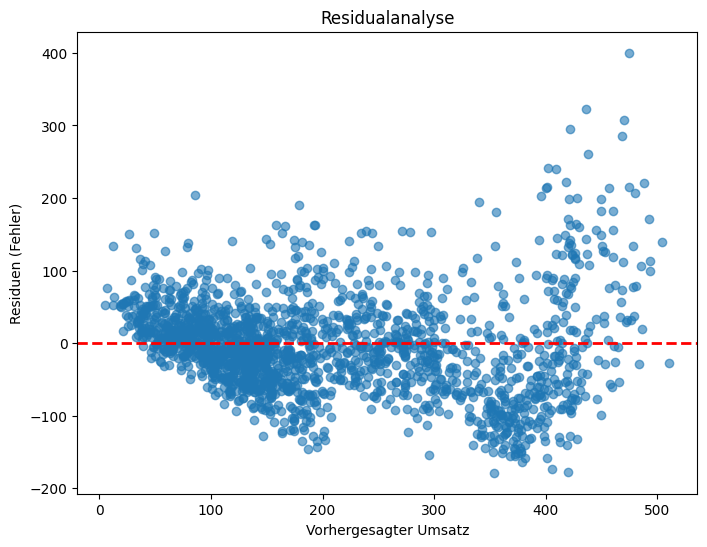

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Vorhergesagter Umsatz')
plt.ylabel('Residuen (Fehler)')
plt.title('Residualanalyse')
plt.show()

Histogramm

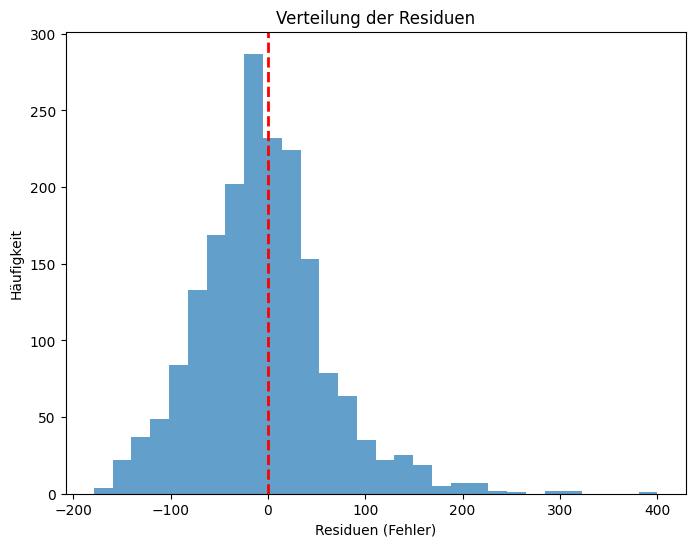

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Residuen (Fehler)')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Residuen')
plt.show()

Koeffizientenvisualisierung

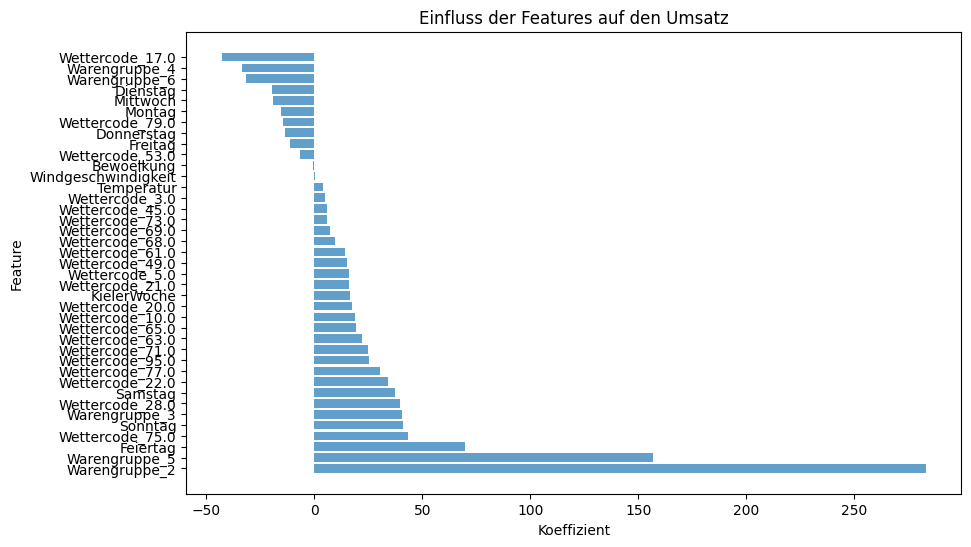

In [16]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], alpha=0.7)
plt.xlabel('Koeffizient')
plt.ylabel('Feature')
plt.title('Einfluss der Features auf den Umsatz')
plt.show()

Zeitreihenanalyse

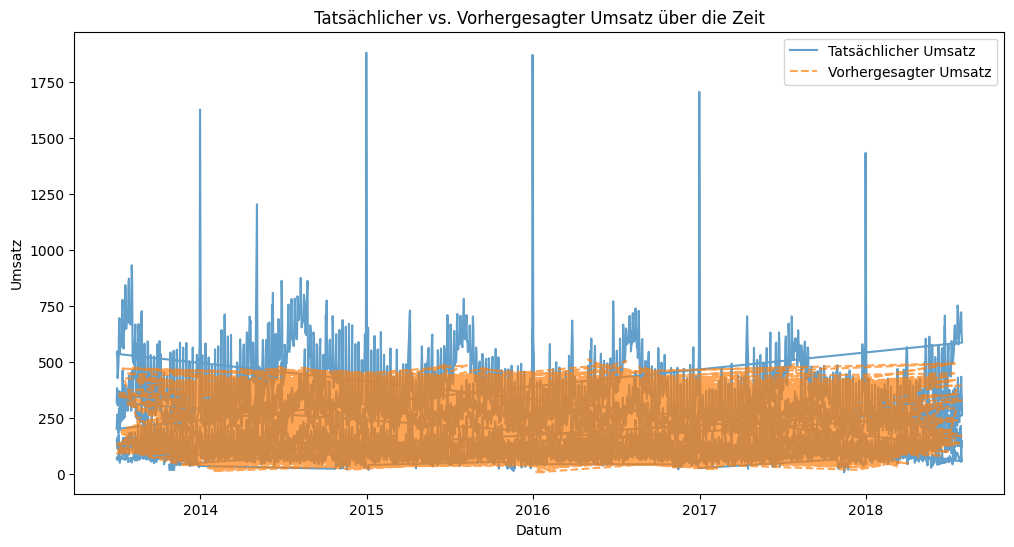

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['Datum'], y, label='Tatsächlicher Umsatz', alpha=0.7)
plt.plot(data['Datum'].iloc[y_test.index], y_pred, label='Vorhergesagter Umsatz', alpha=0.7, linestyle='--')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.title('Tatsächlicher vs. Vorhergesagter Umsatz über die Zeit')
plt.legend()
plt.show()

Feature-Wichtigkeit für erklärende Variablen

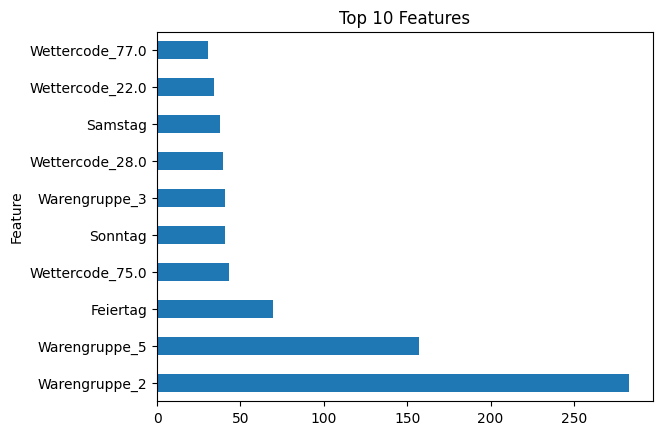

In [18]:
coefficients.head(10).plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Top 10 Features')
plt.show()